## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [10]:
wine = datasets.load_wine()
S=wine['data']
x = pd.DataFrame(wine['data'], columns=wine['feature_names'])
T=wine.data[:, np.newaxis, 0]

print(T)
x.head()

[[14.23]
 [13.2 ]
 [13.16]
 [14.37]
 [13.24]
 [14.2 ]
 [14.39]
 [14.06]
 [14.83]
 [13.86]
 [14.1 ]
 [14.12]
 [13.75]
 [14.75]
 [14.38]
 [13.63]
 [14.3 ]
 [13.83]
 [14.19]
 [13.64]
 [14.06]
 [12.93]
 [13.71]
 [12.85]
 [13.5 ]
 [13.05]
 [13.39]
 [13.3 ]
 [13.87]
 [14.02]
 [13.73]
 [13.58]
 [13.68]
 [13.76]
 [13.51]
 [13.48]
 [13.28]
 [13.05]
 [13.07]
 [14.22]
 [13.56]
 [13.41]
 [13.88]
 [13.24]
 [13.05]
 [14.21]
 [14.38]
 [13.9 ]
 [14.1 ]
 [13.94]
 [13.05]
 [13.83]
 [13.82]
 [13.77]
 [13.74]
 [13.56]
 [14.22]
 [13.29]
 [13.72]
 [12.37]
 [12.33]
 [12.64]
 [13.67]
 [12.37]
 [12.17]
 [12.37]
 [13.11]
 [12.37]
 [13.34]
 [12.21]
 [12.29]
 [13.86]
 [13.49]
 [12.99]
 [11.96]
 [11.66]
 [13.03]
 [11.84]
 [12.33]
 [12.7 ]
 [12.  ]
 [12.72]
 [12.08]
 [13.05]
 [11.84]
 [12.67]
 [12.16]
 [11.65]
 [11.64]
 [12.08]
 [12.08]
 [12.  ]
 [12.69]
 [12.29]
 [11.62]
 [12.47]
 [11.81]
 [12.29]
 [12.37]
 [12.29]
 [12.08]
 [12.6 ]
 [12.34]
 [11.82]
 [12.51]
 [12.42]
 [12.25]
 [12.72]
 [12.22]
 [11.61]
 [11.46]
 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = wine.data[:, np.newaxis, 5]
print("Data shape: ", X.shape) # 可以看見有 178 筆資料與我們取出的其中一個 feature

Data shape:  (178, 1)


In [12]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, wine.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [13]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [-0.8811764]
Mean squared error: 0.22


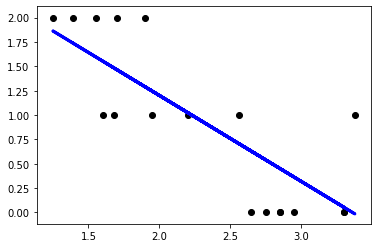

In [14]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show();


In [15]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)
# 建立模型
logreg = linear_model.LogisticRegression()
# 訓練模型
logreg.fit(x_train, y_train)
# 預測測試集
y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9444444444444444


c:\users\aaron\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\aaron\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
